Elit Jasmine Dogu (ejd5mm)       
DS 5001    
5 May 2021    
*Third year, Undergraduate Student*     



# What This File Contains
- Word2vec
- Visualizing Word2Vec
- LDA Topic Modeling
- Looking at the Topic Pertaining to Gatsby

In [1]:
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import os
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
import nltk

In [2]:
#creating subdirectories
data_in = './data_in'
data_out = './data_out'

In [3]:
#reading in the txt file
epub_file = "The-Great-Gatsby.txt" # Source file- Project Guttenburg 

In [4]:
import dill 
dill.load_session('notebook_env_file4.db') #loading in all of the tables and everything in the environment of File3.ipynb

In [5]:
data_in = './data_in'
data_out = './data_out'
data_prefix = 'novels'

## Word2vec Setup

In [6]:
OHCO = ['book', 'chapter', 'para_num', 'sent_num', 'token_num']
PARA = OHCO[:4] # Paragraphs
SENT = OHCO[:5] # Sentences
BAG = PARA
# BAG = SENT

In [7]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    #size = 246,
    min_count = 50,
    workers = 4
)

In [8]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [9]:
BOOK['book'] = 'gatsby'
BOOK = BOOK.reset_index()
BOOK['chapter'] = BOOK['chap_num']

#BOOK= BOOK.rename(index={chap_num: "chapter"})

In [10]:
BOOK

,chap_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id,book,chapter
0,1,0,0,0,"(In, IN)",IN,In,in,100,gatsby,1
1,1,0,0,1,"(my, PRP$)",PRP$,my,my,100,gatsby,1
2,1,0,0,2,"(younger, JJR)",JJR,younger,younger,100,gatsby,1
3,1,0,0,3,"(and, CC)",CC,and,and,100,gatsby,1
4,1,0,0,4,"(more, RBR)",RBR,more,more,100,gatsby,1
...,...,...,...,...,...,...,...,...,...,...,...
61061,9,497,0,12,"(ceaselessly, RB)",RB,ceaselessly,ceaselessly,100,gatsby,9
61062,9,497,0,13,"(into, IN)",IN,into,into,100,gatsby,9
61063,9,498,0,0,"(the, DT)",DT,the,the,100,gatsby,9
61064,9,498,0,1,"(past, NN)",NN,past,past,100,gatsby,9


## Word2vec

In [11]:
DOCS = BOOK[~BOOK.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [12]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [13]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

In [14]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [15]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


In [16]:
df

,x,y
,10.325865,8.728894
the,-7.027673,-4.370130
and,-6.639829,-3.892193
a,-6.082732,-2.808284
i,8.510923,8.384639
...,...,...
would,-0.143278,3.433992
saw,2.452170,-6.602655
face,1.992152,-4.817534
only,2.821656,-6.611117


## Visualize Word2vec

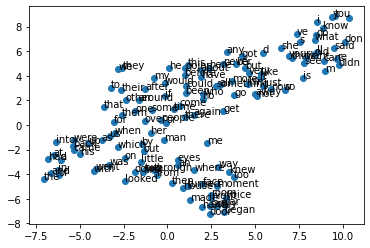

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('./data_out/file2/word2vec')

plt.show()

## LDA Topic Modeling

In [18]:
epub_read = open("{}/{}".format(data_in, epub_file), 'r', encoding='utf-8-sig').read().replace('"',' ').replace('’','\'').split('\n\n') #reads each line 
text = [x.lower().replace('\n', ' ') for x in epub_read if len(x)>500]


In [19]:
stop_words = set(stopwords.words('english')) 

text_no_sw = []

for sent in epub_read:
    tokens = ' '.join(TextBlob(sent).noun_phrases).split()
    cleaned_sent=[]
    for w in tokens:
        w = Word(w).lemmatize()
        if w not in stop_words and len(w)>4:
            cleaned_sent.append(w)
    if len(cleaned_sent)!=0:
        text_no_sw.append(' '.join(cleaned_sent))

In [20]:
text_no_sw[0] #should have no stop words

'project gutenberg gatsby scott fitzgerald'

In [21]:

def get_topics(components, feature_names, n=50):
    for idx, topic in enumerate(components):
        print("\nTopic %d: " % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        
vectorizer = TfidfVectorizer(max_features=1000) 
X = vectorizer.fit_transform(text_no_sw)


In [22]:
nmf_model = NMF(n_components=10, init='random', random_state=0)
nmf_top = nmf_model.fit_transform(X)

In [23]:
terms = vectorizer.get_feature_names() 
get_topics(nmf_model.components_,terms)

#10 topics generated 


Topic 1:  [('wilson', 0.95), ('michaelis', 0.1), ('george', 0.05), ('yellow', 0.03), ('office', 0.03), ('mckee', 0.02), ('upper', 0.02), ('garage', 0.02), ('he', 0.02), ('ah', 0.01), ('chance', 0.01), ('superior', 0.01), ('picking', 0.01), ('blind', 0.01), ('window', 0.01), ('white', 0.01), ('smile', 0.01), ('light', 0.01), ('hello', 0.01), ('business', 0.01), ('roosevelt', 0.01), ('certain', 0.01), ('voice', 0.01), ('airedale', 0.01), ('brown', 0.01), ('violent', 0.01), ('place', 0.01), ('apartment', 0.01), ('worn', 0.01), ('cement', 0.01), ('out', 0.01), ('small', 0.01), ('or', 0.01), ('colour', 0.01), ('night', 0.01), ('street', 0.01), ('york', 0.01), ('whisper', 0.01), ('special', 0.01), ('policeman', 0.01), ('reason', 0.01), ('laden', 0.01), ('significance', 0.01), ('then', 0.01), ('his', 0.01), ('158th', 0.01), ('grief', 0.01), ('amount', 0.01), ('particular', 0.01), ('throwing', 0.01)]

Topic 2:  [('daisy', 1.77), ('house', 0.04), ('voice', 0.03), ('night', 0.02), ('people', 0.

## Looking at Gatsby's Topic Model 

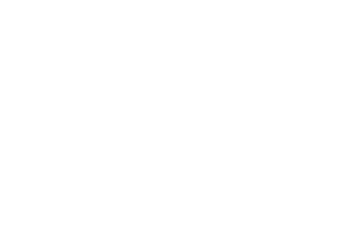

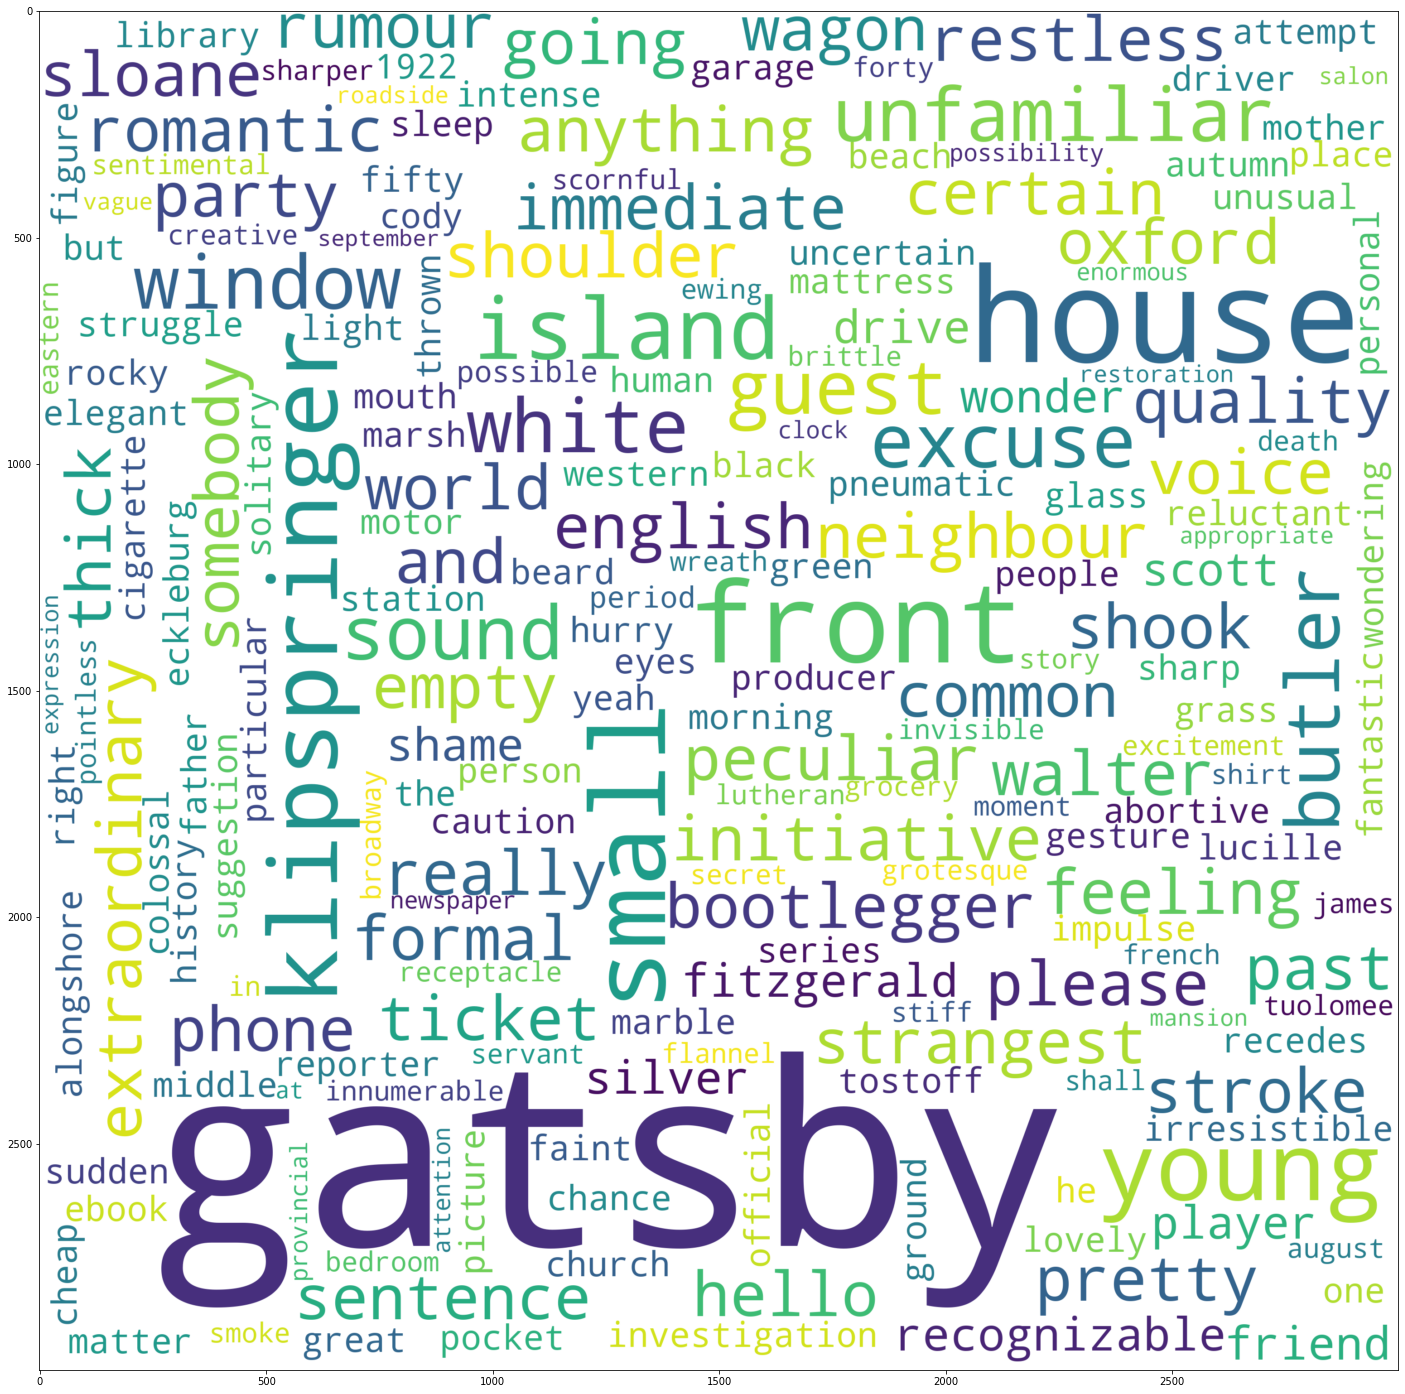

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
    

for idx, topic in enumerate(nmf_model.components_):
    if idx == 8:
        topic_x = [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-1000 - 1:-1]]
        topic_x = {i[0]:i[1] for i in topic_x}
            
wordcloud = WordCloud(width = 3000, height = 3000, stopwords=STOPWORDS, background_color="white", min_font_size = 30)
wordcloud = wordcloud.generate_from_frequencies(topic_x)

plt.axis("off")
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation="bilinear")
wordcloud.to_file('./data_out/file2/topic_gatsby.png')
plt.show()


The paper goes more into detail on this; however, looking at all of the topics, I was most interested in the one that involved Gatsby. I wanted to see what type of words would appear when our program generated topics of its own. As we can see, a lot of the characteristics that Gatsby portrays are present here.